In [1]:
import pandas as pd
from random import choice
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import get_named_colors_mapping
import matplotlib.animation as animation
from IPython.display import HTML
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
data=pd.read_csv(url)

In [4]:
#data = pd.read_csv("./inputs/owid-covid-data.csv")

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60894 entries, 0 to 60893
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               60547 non-null  object 
 1   continent                              60184 non-null  object 
 2   location                               60894 non-null  object 
 3   date                                   60894 non-null  object 
 4   total_cases                            60300 non-null  float64
 5   new_cases                              60293 non-null  float64
 6   new_cases_smoothed                     59338 non-null  float64
 7   total_deaths                           51827 non-null  float64
 8   new_deaths                             51826 non-null  float64
 9   new_deaths_smoothed                    59338 non-null  float64
 10  total_cases_per_million                59953 non-null  float64
 11  ne

In [7]:
data2 = data[["location","date","total_cases"]]

In [8]:
data2[["date"]]= data2[["date"]].apply(pd.to_datetime)

In [9]:
data2.info(),data2.date.min()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60894 entries, 0 to 60893
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     60894 non-null  object        
 1   date         60894 non-null  datetime64[ns]
 2   total_cases  60300 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ MB


(None, Timestamp('2020-01-01 00:00:00'))

In [10]:
data2["days"] = ((data2["date"]-data2.date.min()).astype(int)/10e8)/86400

In [11]:
data2.head()

,location,date,total_cases,days
0,Afghanistan,2020-02-24,1.0,54.0
1,Afghanistan,2020-02-25,1.0,55.0
2,Afghanistan,2020-02-26,1.0,56.0
3,Afghanistan,2020-02-27,1.0,57.0
4,Afghanistan,2020-02-28,1.0,58.0


In [12]:
data2.days.max()

384.0

In [13]:
data2.dtypes

location               object
date           datetime64[ns]
total_cases           float64
days                  float64
dtype: object

In [14]:
data2["day"] = data2['date'].map(lambda x: x.day)
data2["month"] = data2['date'].map(lambda x: x.month)
data2["year"] = data2['date'].map(lambda x: x.year)
data2.head()

,location,date,total_cases,days,day,month,year
0,Afghanistan,2020-02-24,1.0,54.0,24,2,2020
1,Afghanistan,2020-02-25,1.0,55.0,25,2,2020
2,Afghanistan,2020-02-26,1.0,56.0,26,2,2020
3,Afghanistan,2020-02-27,1.0,57.0,27,2,2020
4,Afghanistan,2020-02-28,1.0,58.0,28,2,2020


In [15]:
data2= data2.drop(columns=["date","year"], index=1)

In [16]:
data2.head()

,location,total_cases,days,day,month
0,Afghanistan,1.0,54.0,24,2
2,Afghanistan,1.0,56.0,26,2
3,Afghanistan,1.0,57.0,27,2
4,Afghanistan,1.0,58.0,28,2
5,Afghanistan,1.0,59.0,29,2


In [17]:
#data2.set_index("location")
#data2.head()
data2 = data2.groupby(["location", "days"], as_index= False).sum()

In [18]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60888,Zimbabwe,379.0,25368.0,14,1
60889,Zimbabwe,380.0,26109.0,15,1
60890,Zimbabwe,381.0,26881.0,16,1
60891,Zimbabwe,382.0,27203.0,17,1


In [19]:
data2.columns

Index(['location', 'days', 'total_cases', 'day', 'month'], dtype='object')

In [20]:
data2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            60883, 60884, 60885, 60886, 60887, 60888, 60889, 60890, 60891,
            60892],
           dtype='int64', length=60893)

In [21]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60888,Zimbabwe,379.0,25368.0,14,1
60889,Zimbabwe,380.0,26109.0,15,1
60890,Zimbabwe,381.0,26881.0,16,1
60891,Zimbabwe,382.0,27203.0,17,1


In [22]:
data2 = data2[~data2["location"].str.contains("World")]
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60888,Zimbabwe,379.0,25368.0,14,1
60889,Zimbabwe,380.0,26109.0,15,1
60890,Zimbabwe,381.0,26881.0,16,1
60891,Zimbabwe,382.0,27203.0,17,1


In [23]:
data2.days.max()

384.0

,location,days,total_cases,day,month
35455,Mexico,150.0,87512.0,30,5
9811,Canada,150.0,91681.0,30,5
11063,Chile,150.0,118720.0,30,5
25675,Iran,150.0,148950.0,30,5
42827,Peru,150.0,155671.0,30,5
56016,Turkey,150.0,163103.0,30,5
24670,India,150.0,181827.0,30,5
20757,Germany,150.0,183189.0,30,5
19452,France,150.0,190744.0,30,5
27044,Italy,150.0,232664.0,30,5


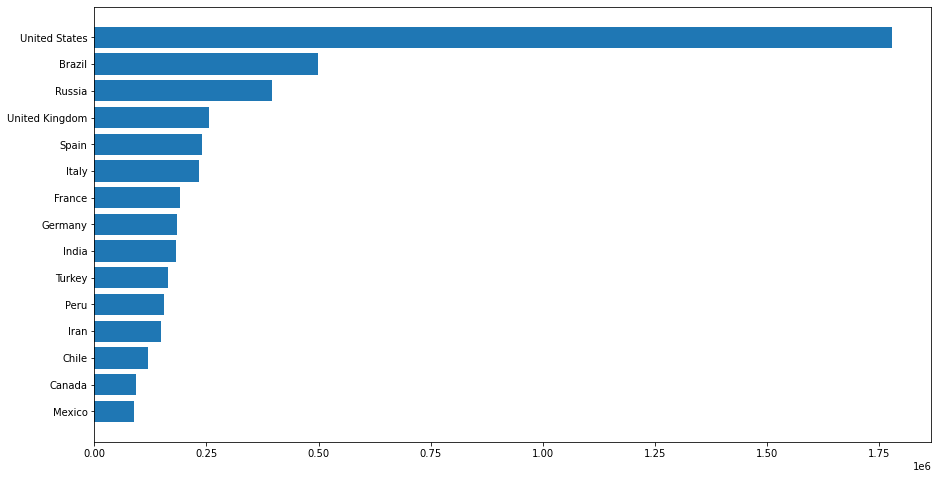

In [24]:
current_days=150
dff=(data2[data2.days.eq(current_days)].sort_values(by='total_cases', ascending=True).tail(15))
#dff[dff.location=="World"]


display(dff)

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.location, dff.total_cases);

In [25]:
countries = list(set(data2.location.tolist()))
values = get_named_colors_mapping().values()

values_list = list(values)

Text(1, 0.4, 'May')

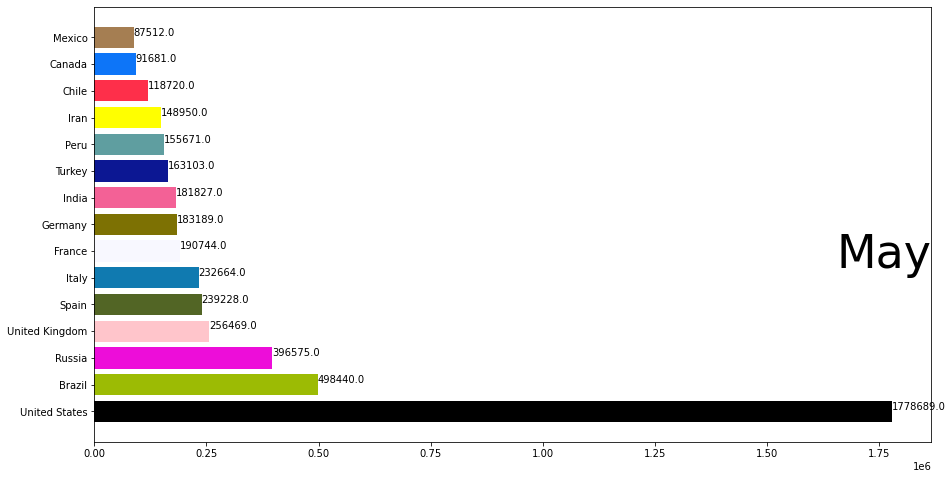

In [26]:
colors=dict(zip(countries,
                [choice(values_list)for x in countries]))

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   

ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])

for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'])):
    #ax.text(value, i,     name,            ha='right')  
    ax.text(value, i,     value,           ha='left',va='bottom')   

ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')

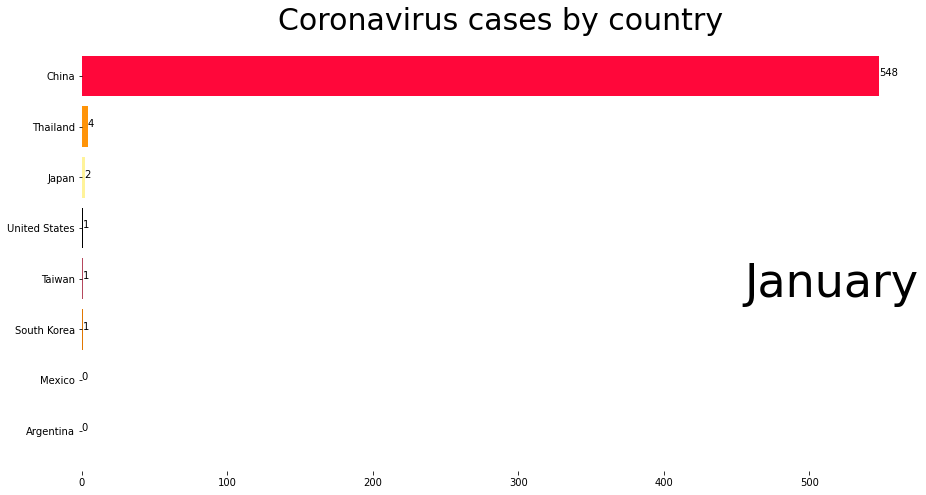

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchar(day):
    dff=(data2[data2.days.eq(day)].sort_values(by='total_cases', ascending=True).tail(10))
    ax.clear()
    ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])
    
    for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'].astype(int))):
        #ax.text(value, i,     name,            ha='right')  
        ax.text(value, i,     value,           ha='left')   

    
    ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')
    #ax.text(1, 0.4, month, transform=ax.transAxes, size=46, ha='right')
    ax.set_title('Coronavirus cases by country', fontdict={'fontsize': 30})
    plt.box(False)
    
draw_barchar(21)

In [28]:
'''
fig, ax = plt.subplots(figsize=(15, 8))

animator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))

HTML(animator.to_jshtml()) 
animator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)
animator.save('outputs/race.gif', writer='imagemagick')
'''

'\nfig, ax = plt.subplots(figsize=(15, 8))\n\nanimator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))\n\nHTML(animator.to_jshtml()) \nanimator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)\nanimator.save(\'outputs/race.gif\', writer=\'imagemagick\')\n'

In [29]:
data = data[~data["location"].str.contains("World")]
data = data[~data["location"].str.contains("International")]
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60889,ZWE,Africa,Zimbabwe,2021-01-14,25368.0,1112.0,956.143,636.0,47.0,27.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60890,ZWE,Africa,Zimbabwe,2021-01-15,26109.0,741.0,921.286,666.0,30.0,28.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60891,ZWE,Africa,Zimbabwe,2021-01-16,26881.0,772.0,911.714,683.0,17.0,28.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60892,ZWE,Africa,Zimbabwe,2021-01-17,27203.0,322.0,818.000,713.0,30.0,29.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [30]:
df_values, df_ranks = bcr.prepare_long_data(data, index='date', columns=['location'],
                                            values='total_cases', steps_per_period=1)

df_values

location,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,53831.0,66635.0,103381.0,8946.0,18679.0,184.0,1783047.0,163972.0,28689.0,390788.0,...,23556097.0,30946.0,77904.0,1.0,27.0,118856.0,1536.0,2111.0,34278.0,26109.0
2021-01-16,53938.0,67216.0,103611.0,9038.0,18765.0,187.0,1791979.0,164235.0,28708.0,392511.0,...,23758855.0,31669.0,77968.0,1.0,27.0,119306.0,1537.0,2112.0,36074.0,26881.0
2021-01-17,53984.0,67690.0,103833.0,9083.0,18875.0,189.0,1799243.0,164586.0,28721.0,393778.0,...,23936773.0,32378.0,77968.0,1.0,27.0,119803.0,1537.0,2112.0,37605.0,27203.0


In [31]:
df_ranks

location,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,97.0,104.0,112.0,59.0,78.0,14.0,179.0,131.0,87.0,156.0,...,190.0,89.0,106.0,2.0,6.0,116.0,30.0,33.0,90.0,84.0
2021-01-16,97.0,104.0,112.0,59.0,78.0,14.0,179.0,131.0,86.0,156.0,...,190.0,89.0,106.0,2.0,6.0,116.0,29.0,33.0,90.0,84.0
2021-01-17,97.0,104.0,112.0,58.0,78.0,14.0,179.0,131.0,86.0,156.0,...,190.0,89.0,106.0,2.0,6.0,116.0,29.0,33.0,91.0,84.0


In [32]:
'''
df_values = df_values.fillna(0)
df_values["Europe"]
df = df_values["Europe"]
df.columns
'''

'\ndf_values = df_values.fillna(0)\ndf_values["Europe"]\ndf = df_values["Europe"]\ndf.columns\n'

In [33]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=10,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=10,
                   filename='outputs/covid19_vert2.mp4')

CPU times: user 7min 31s, sys: 3min 12s, total: 10min 44s
Wall time: 3min 36s


In [34]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=15,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/race.gif')

CPU times: user 4min 54s, sys: 2min 10s, total: 7min 4s
Wall time: 6min 27s


In [35]:
'''
import plotly.express as px

data = data.fillna(0)
fig = px.line(data, x="date", y="location", color='new_cases')
fig.show()
'''

'\nimport plotly.express as px\n\ndata = data.fillna(0)\nfig = px.line(data, x="date", y="location", color=\'new_cases\')\nfig.show()\n'

In [36]:
import ipywidgets as widgets



In [37]:
list(set(data.continent.values))

['South America', 'Asia', 'North America', 'Africa', 'Oceania', 'Europe']

In [38]:
continent = widgets.Select(
    options=list(set(data.continent.values)),
    value='Europe',
    # rows=10,
    description='continent:',
    disabled=False
)

display(continent)

Select(description='continent:', index=5, options=('South America', 'Asia', 'North America', 'Africa', 'Oceani…

In [39]:
continent.value

'Europe'

In [40]:
data[data.continent==continent.value]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
330,ALB,Europe,Albania,2020-03-09,2.0,2.0,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
331,ALB,Europe,Albania,2020-03-10,10.0,8.0,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
332,ALB,Europe,Albania,2020-03-11,12.0,2.0,NaN,1.0,1.0,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
333,ALB,Europe,Albania,2020-03-12,23.0,11.0,NaN,1.0,0.0,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
334,ALB,Europe,Albania,2020-03-13,33.0,10.0,NaN,1.0,0.0,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58957,VAT,Europe,Vatican,2021-01-14,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
58958,VAT,Europe,Vatican,2021-01-15,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
58959,VAT,Europe,Vatican,2021-01-16,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
58960,VAT,Europe,Vatican,2021-01-17,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


In [41]:
df_values2, df_ranks2 = bcr.prepare_long_data(data[data.continent==continent.value], index='date', columns=['location'],
                                            values='total_cases', steps_per_period=1)

df_values2 = df_values2.fillna(0)
df_values2

location,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican
date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,66635.0,8946.0,390788.0,221604.0,675089.0,117011.0,211503.0,223812.0,28609.0,874605.0,...,2767.0,369823.0,220707.0,147016.0,2252164.0,523486.0,495228.0,1183963.0,3325642.0,27.0
2021-01-16,67216.0,9038.0,392511.0,223537.0,677209.0,117011.0,211736.0,224575.0,28811.0,883906.0,...,2778.0,371216.0,222752.0,148556.0,2252164.0,523486.0,495228.0,1192114.0,3367070.0,27.0
2021-01-17,67690.0,9083.0,393778.0,225461.0,678839.0,117011.0,211813.0,224954.0,28968.0,889159.0,...,2778.0,372533.0,223325.0,149125.0,2252164.0,523486.0,495228.0,1198512.0,3405740.0,27.0


In [43]:
%%time
bcr.bar_chart_race(df=df_values2, n_bars=15,fixed_max=False,figsize=(5, 3),title=f'COVID-19 cases by Country in {continent.value}',
                   filter_column_colors=True,orientation='h',steps_per_period=10,
                   filename='outputs/racecountry.gif')

CPU times: user 10min 39s, sys: 4min 40s, total: 15min 20s
Wall time: 18min 45s
